In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import os
import sys

In [3]:
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

TRAIN_PATH="./datasets/loan/train.csv"
TEST_PATH="./datasets/loan/train.csv"
 
train_df = pd.read_csv(TRAIN_PATH)
test_df = pd.read_csv(TEST_PATH)

data_combined = {"train": train_df, "test":test_df}
train_df.drop('Loan_ID', axis=1, inplace=True)
test_df.drop('Loan_ID', axis=1, inplace=True)

labelEncoder = LabelEncoder()

yes_no_map = {"Yes":1, "No": 0, "Y":1, "N":0, "NaN": 2}

print(train_df.info())
print('\n\n')

for name,dataset in data_combined.items():
    #fill na
    print(name)         
    for attr in dataset.columns:
        print(attr)
        if( attr in ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']):
            mean = dataset[attr].mean()
            dataset[attr].fillna(mean, inplace=True)
        if(attr in ["Married", "Self_Employed", "Loan_Status"]):
            dataset[attr].fillna("NaN", inplace=True)
            dataset[attr] = dataset[attr].map(yes_no_map).astype(int)
            print(dataset[attr].unique())
        if(dataset[attr].dtype==np.object):
    
            dataset[attr].fillna("NaN", inplace=True)
            dataset[attr] = labelEncoder.fit_transform(dataset[attr].values).astype(int)
            print(labelEncoder.classes_)
        if(attr=="Loan_Amount_Term"):
            dataset[attr].fillna(0, inplace = True)
            dataset[attr].astype(np.int64)
            dataset[attr] = labelEncoder.fit_transform(dataset[attr].values)
            print(labelEncoder.classes_)
        if(attr=="Credit_History"):
            dataset[attr].fillna(2, inplace = True)
            dataset[attr].astype(np.int64)
    print()

train_df.info()
train_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB
None



train
Gender
['Female' 'Male' 'NaN']
Married
[0 1 2]
Dependents
['0' '1' '2' '3+' 'NaN']
Education
['Graduate' 'Not Graduate']
Self_Employed
[0 1 2]
App

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,9,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,9,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,9,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,9,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.000000,9,1.0,2,1


In [4]:
def group(attr1, attr2):
    print(train_df[[attr1, attr2]].groupby(attr1).mean())
    #print(train_df[[attr1, attr2]].groupby(attr1).mean().sort_values(by=attr1, ascending=True))
    
group("Gender", "Loan_Status")

group("Education", "Loan_Status")

group("Self_Employed", "Loan_Status")

group("Loan_Amount_Term", "Loan_Status")

group("Credit_History", "Loan_Status")

group("Property_Area", "Loan_Status")

        Loan_Status
Gender             
0          0.669643
1          0.693252
2          0.615385
           Loan_Status
Education             
0             0.708333
1             0.611940
               Loan_Status
Self_Employed             
0                 0.686000
1                 0.682927
2                 0.718750
                  Loan_Status
Loan_Amount_Term             
0                    0.571429
1                    1.000000
2                    0.000000
3                    1.000000
4                    0.750000
5                    1.000000
6                    0.659091
7                    0.750000
8                    0.615385
9                    0.701172
10                   0.400000
                Loan_Status
Credit_History             
0.0                0.078652
1.0                0.795789
2.0                0.740000
               Loan_Status
Property_Area             
0                 0.614525
1                 0.768240
2                 0.658416


Text(0.5, 1.0, 'Correlation matrix')

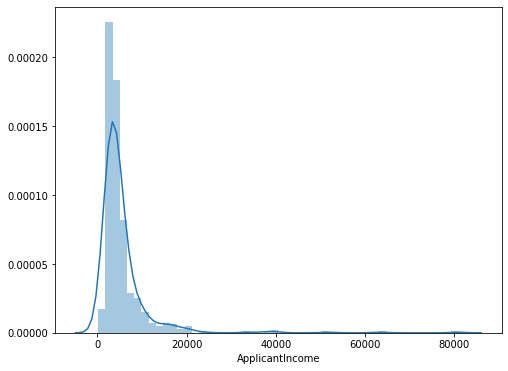

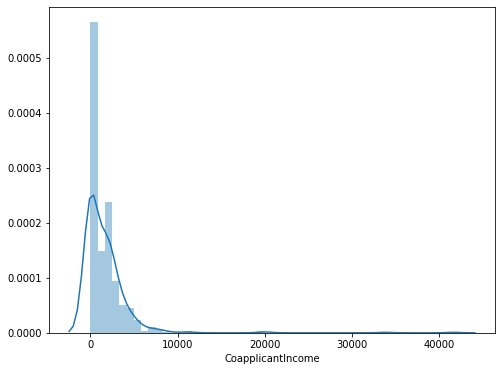

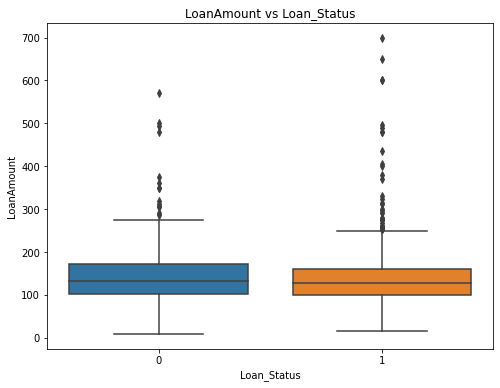

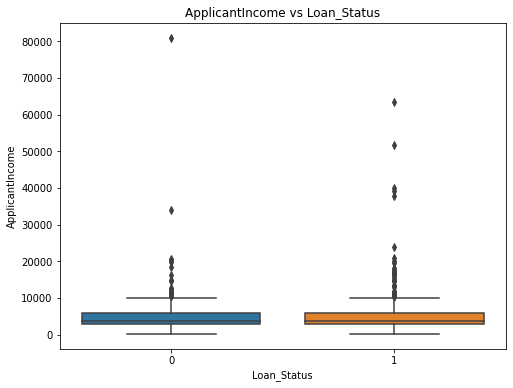

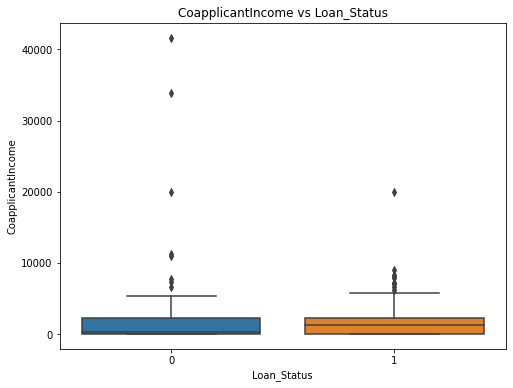

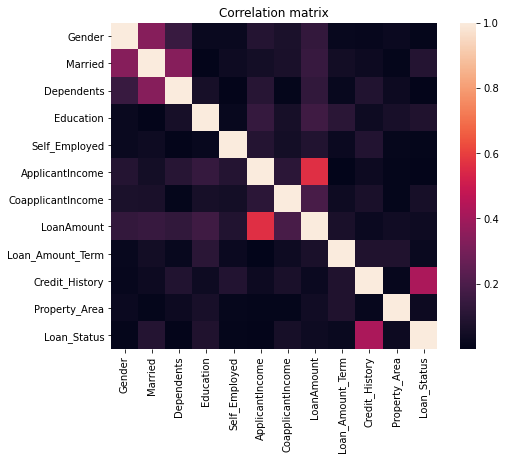

In [5]:
# grid = sns.FacetGrid(train_df, row='Gender', size=2.2, aspect=1.6)
# grid.map(sns.pointplot, 'Gender', 'Loan_Status', palette='deep')
# grid.add_legend()

f, ax = plt.subplots(figsize=(8, 6))
sns.distplot(train_df['ApplicantIncome'])

f, ax = plt.subplots(figsize=(8, 6))
sns.distplot(train_df['CoapplicantIncome'])

temp_df = pd.concat([train_df["LoanAmount"], train_df["Loan_Status"]],axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x="Loan_Status", y="LoanAmount", data=temp_df).set_title("LoanAmount vs Loan_Status")

temp_df = pd.concat([train_df["ApplicantIncome"], train_df["Loan_Status"]],axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x="Loan_Status", y="ApplicantIncome", data=temp_df).set_title("ApplicantIncome vs Loan_Status")

temp_df_1 = pd.concat([train_df["CoapplicantIncome"], train_df["Loan_Status"]],axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x="Loan_Status", y="CoapplicantIncome", data=temp_df_1).set_title("CoapplicantIncome vs Loan_Status")

# Get the correlation matrix 
corr_matrix = np.abs(train_df.corr())
f, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(corr_matrix, square=True).set_title("Correlation matrix")

In [9]:
X_train = train_df.drop("Loan_Status", axis=1)
y_train = train_df['Loan_Status']
X_test = test_df.drop("Loan_Status", axis=1)
y_test = test_df["Loan_Status"]

print(X_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Dependents         614 non-null    int64  
 3   Education          614 non-null    int64  
 4   Self_Employed      614 non-null    int64  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    int64  
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int64  
dtypes: float64(3), int64(8)
memory usage: 52.9 KB
None


In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

def measure(name, y_pred, y_true):
    print("========================")
    print("CLF ", name)
    print("Accuracy ", accuracy_score(y_pred, y_true, normalize=True))
    print("Precision ", precision_score(y_pred, y_true))
    print("Recall ", recall_score(y_pred, y_true))
    print("F1 weighted", f1_score(y_pred, y_true, average="weighted"))

def run_clf(clf, X_train, y_train, X_test, y_test, clf_name= None, measure_function=measure):
    clf.fit(X_train, y_train)
    if measure is not None:
        if clf_name is not None:
            name = clf_name
        else:
            name = clf.__class__.__name__
        measure(name, clf.predict(X_test), y_test)
    else:
        return clf.predict(X_test, y_test)
    
lr = LogisticRegression(random_state=0)
svc = make_pipeline(StandardScaler(), SVC(gamma='auto'))
linear_svc = make_pipeline(StandardScaler(), LinearSVC(random_state=0, tol=1e-5))
knn = KNeighborsClassifier(n_neighbors=2)
guassian = GaussianNB()
perception = Perceptron()
sgd =SGDClassifier()
dtree = DecisionTreeClassifier()
random_forest = RandomForestClassifier(n_estimators=100)


run_clf(lr, X_train, y_train, X_test, y_test)
run_clf(sgd, X_train, y_train, X_test, y_test)
run_clf(svc, X_train, y_train, X_test, y_test, clf_name="SVC")
run_clf(linear_svc, X_train, y_train, X_test, y_test, clf_name="Linear SVC")
run_clf(knn, X_train, y_train, X_test, y_test)
run_clf(guassian, X_train, y_train, X_test, y_test)
run_clf(perception, X_train, y_train, X_test, y_test)
run_clf(dtree, X_train, y_train, X_test, y_test)
run_clf(random_forest, X_train, y_train, X_test, y_test)

/Users/nguyen/Desktop/python-workspace/datascience/env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/nguyen/Desktop/python-workspace/datascience/env/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


CLF  LogisticRegression
Accuracy  0.8094462540716613
Precision  0.981042654028436
Recall  0.7915869980879541
F1 weighted 0.8332666301635351
CLF  SGDClassifier
Accuracy  0.46905537459283386
Precision  0.466824644549763
Recall  0.6610738255033557
F1 weighted 0.4499752779273926
CLF  SVC
Accuracy  0.8208469055374593
Precision  0.9881516587677726
Recall  0.7988505747126436
F1 weighted 0.8428989022746871
CLF  Linear SVC
Accuracy  0.8110749185667753
Precision  0.981042654028436
Recall  0.7931034482758621
F1 weighted 0.8343297514896701
CLF  KNeighborsClassifier
Accuracy  0.7899022801302932
Precision  0.6943127962085308
Recall  1.0
F1 weighted 0.7824393561749982
CLF  GaussianNB
Accuracy  0.7899022801302932
Precision  0.9289099526066351
Recall  0.7983706720977597
F1 weighted 0.8049739123166382
CLF  Perceptron
Accuracy  0.3941368078175896
Precision  0.1872037914691943
Recall  0.7314814814814815
F1 weighted 0.43733367097648895
CLF  DecisionTreeClassifier
Accuracy  1.0
Precision  1.0
Recall  1.0
F1